In [2]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from coffea import hist, processor
import coffea
import uproot
import sys
sys.path.insert(0,"../")
# from corrections import add_pileup_weight

import pickle
import glob

import mplhep as hep
plt.style.use(hep.style.CMS) 

In [3]:
def relabel(h):
    a = h.axis('dataset')
    for s in a.identifiers():
        if "testpoint" in s.name or "=" in s.name or len(s.name.split("_"))==0: continue
        if "HNL" in s.name:
            m = float(s.name.split("_")[-2].replace("mHNL","").replace("p","."))
            ct = int(s.name.split("_")[-1].replace("pl",""))
        #     print("m=%s,ct=%s"%(m,ct)    )
            a.index(s).label = "m=%s,ct=%s"%(m,ct)
        elif "WJets" in s.name:
            a.index(s).label = "Wjets"
    return 

In [4]:
import HNLprocessor.corrections as corrections

xsections = corrections.load_xsection()

with open('../HNL_histograms_Feb3_electrons.pickle','rb') as f:                
    out = pickle.load(f)
    
lumi = 137 ## fb
    
for k,h in out.items():
    print(k,)
#     if (type(h)!=hist.Hist): continue
#     h.scale({ d: lumi for d in h.identifiers("dataset") if d.name in xsections.keys()}, axis="dataset")
#     relabel(h)

nCluster
nCluster_dt
nCluster_n-1
accept
ClusterSize
ClusterTime
ClusterEta
ClusterAvgStation10
ClusterNStation10
dphi_cluster_csc
ClusterSize_dt
ClusterTime_dt
ClusterEta_dt
ClusterAvgStation10_dt
ClusterNStation10_dt
dphi_cluster_dt
nLeptons
elePt
eleEta
muPt
muEta
nJets
jetPt
jetMet_dPhi
metXYCorr
MT
nPU
nPU_noweight
gWPt
gWPt_noweight
glepdPhi
gLepPt
gLLP_e
gLLP_pt
gLLP_eta
sumw


In [6]:
out['sumw']

defaultdict_accumulator(float,
                        {'HNL_electronType_mHNL1p0_pl10': 662099.0,
                         'HNL_electronType_mHNL1p0_pl1000': 661983.0,
                         'HNL_electronType_mHNL1p0_pl100': 659831.0,
                         'EGamma_2018B': 6330716.0,
                         'EGamma_2018A': 1126568.0,
                         'WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8': 1297009.0,
                         'HNL_electronType_mHNL4p0_pl10_rwctau40': 659381.0,
                         'HNL_electronType_mHNL4p0_pl1000_rwctau2000': 660231.0,
                         'HNL_electronType_mHNL4p0_pl1000': 660231.0,
                         'HNL_electronType_mHNL2p0_pl1000': 659066.0,
                         'HNL_electronType_mHNL4p0_pl10': 659381.0,
                         'HNL_electronType_mHNL2p0_pl1000_rwctau10000': 659066.0,
                         'HNL_electronType_mHNL2p0_pl10_rwctau4': 662028.0,
                         'HNL_electronType_mHNL2p0

In [9]:
h = out['dphi_cluster_dt']
[d.name for d in h.identifiers("dataset")]

['EGamma_2018A',
 'EGamma_2018B',
 'EGamma_2018C',
 'EGamma_2018D',
 'HNL_electronType_mHNL1p0_pl10',
 'HNL_electronType_mHNL1p0_pl100',
 'HNL_electronType_mHNL1p0_pl1000',
 'HNL_electronType_mHNL2p0_pl10',
 'HNL_electronType_mHNL2p0_pl1000',
 'HNL_electronType_mHNL2p0_pl1000_rwctau10000',
 'HNL_electronType_mHNL2p0_pl10_rwctau4',
 'HNL_electronType_mHNL4p0_pl10',
 'HNL_electronType_mHNL4p0_pl1000',
 'HNL_electronType_mHNL4p0_pl1000_rwctau2000',
 'HNL_electronType_mHNL4p0_pl10_rwctau40',
 'WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8']

In [6]:
h=out['ClusterSize']
h.sum("dataset","region","ClusterSize").values()

{(): 10923.0}

In [7]:
out['dphi_cluster_csc'].identifiers("region")

[<StringBin (ABCD) instance at 0x7f7701543990>,
 <StringBin (ABCD_OOT) instance at 0x7f7701543a10>,
 <StringBin (PreSel) instance at 0x7f7701543910>]

In [70]:
out['dphi_cluster_dt'].identifiers("region")

[<StringBin (ABCD_dt) instance at 0x7f5df28e3610>,
 <StringBin (ABCD_dt_OOT) instance at 0x7f5df28e3350>]

In [22]:
out['dphi_cluster_csc']['Muon_2018D'].integrate("region","ABCD").project("dphi_lep").values()

{(): array([ 65.,  68.,  68.,  79.,  95.,  87.,  92.,  85.,  74.,  75.,  82.,
         73.,  73.,  64.,  81.,  91.,  88.,  79.,  82.,  72.,  78.,  70.,
         91., 102.,  83.,  69.,  93.,  81.,  77.,  99.])}

In [76]:
out['dphi_cluster_dt']['Muon_2018D'].integrate("region","ABCD_dt").project("dphi_lep").values()

{(): array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [77]:
out['dphi_cluster_dt']["Muon_2018D"].integrate("region","ABCD_dt").project("dphi_lep").values()

{(): array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [19]:
plt.style.use(hep.style.CMS) 
h = out['dphi_cluster_lep']

region=["ABCD_OOT"]

h = h[signals].integrate("region",region)

# h = h.project("dataset","nCluster")
h = h.project("dataset","cutFlow")

fig, axs = plt.subplots(1,1, figsize=(12,8))

ax = hist.plot1d(h,density=True)
ax.set_yscale("log")
ax.set_ylim(1e-4,None)
hep.cms.label(ax=ax)

NameError: name 'signals' is not defined

In [21]:
def getABCD(dataset,A,B,C,D):   
    if dataset==None:
        a,a_err2 = A.values(True)[()]
        b,b_err2 = B.values(True)[()]
        c,c_err2 = C.values(True)[()]
        d,d_err2 = D.values(True)[()]
    else:
        a,a_err2 = A.values(True)[(dataset,)]
        b,b_err2 = B.values(True)[(dataset,)]
        c,c_err2 = C.values(True)[(dataset,)]
        d,d_err2 = D.values(True)[(dataset,)]
    
    r = {
        "A"   :"%.2f +- %.2f"%(a,a_err2**0.5),
        "B"   :"%.2f +- %.2f"%(b,b_err2**0.5), 
        "C"   :"%.2f +- %.2f"%(c,c_err2**0.5),
        "D"   :"%.2f +- %.2f"%(d,d_err2**0.5),        
        "pred":"%.2f +- %.2f"%(a*c/b,(a*c/b)*(a_err2/a**2+b_err2/b**2+c_err2/c**2)**0.5),        
    }
    return r

In [74]:
h = out['dphi_cluster_dt']
h = h.integrate("region",["ABCD_dt"])
h = h[signals].integrate("dphi_MET",slice(0.75,None))

In [76]:
A.values()

{('HNL_muonType_mHNL4p0_pl100',): 0.002026604849575172,
 ('HNL_muonType_mHNL2p0_pl100',): 0.1964905955289611,
 ('HNL_muonType_mHNL1p0_pl1000',): 0.49341617664278414}

# OOT CSC validation

In [19]:
def plotValidation(h,region,label,lumi):
    fig, axs = plt.subplots(1,3, figsize=(27,9))

    axs = axs.flatten()
    hist.plot2d(h[(region)].project("dphi_lep","ClusterSize"),xaxis="ClusterSize",ax=axs[0])

    hist.plot1d(h[(region)].integrate("ClusterSize",slice(50,80)).project("dphi_lep"),ax=axs[1],clear=False)
    hist.plot1d(h[(region)].integrate("ClusterSize",slice(80,None)).project("dphi_lep"),ax=axs[1],clear=False)    

    hist.plot1d(h[(region)].integrate("dphi_lep",slice(2.0,None)).project("ClusterSize"),ax=axs[2],clear=False)
    hist.plot1d(h[(region)].integrate("dphi_lep",slice(2.5,None)).project("ClusterSize"),ax=axs[2],clear=False)

    axs[0].set_xlim(0,500)
    axs[2].set_xlim(0,500)
    axs[2].set_yscale("log")
    axs[2].set_ylim(0.1,None)

    for ax in axs:
        hep.cms.label(ax=ax,label="Preliminary",data=True,lumi=lumi)

    labels = ["N_rechit [50,80)","N_rechit >80"]
    axs[1].legend(labels,title=label)
    labels = [ r'$\Delta\phi(cluster,lep)>2.0$',r'$\Delta\phi(cluster,lep)>2.5$']
    axs[2].legend(labels,title=label,loc=1)

    plt.tight_layout()
    
def printClosure(h,sizeCuts,dphi_lep,dphi_cuts,size):

    cuts = [60,70,80,90,100,110]
    data=[]
    for cut in sizeCuts:
        A = h.integrate("ClusterSize",slice(cut,None)).integrate("dphi_lep",slice(None,dphi_lep))
        B = h.integrate("ClusterSize",slice(None,cut)).integrate("dphi_lep",slice(None,dphi_lep))
        C = h.integrate("ClusterSize",slice(None,cut)).integrate("dphi_lep",slice(dphi_lep,None))
        D = h.integrate("ClusterSize",slice(cut,None)).integrate("dphi_lep",slice(dphi_lep,None))

        k=None
        row = getABCD(k,A,B,C,D)
        row["cut"]="N_hit>%s"%cut
        data.append(row)

    cuts = [1.8,1.9,2.0,2.1,2.2,2.5]

    for cut in dphi_cuts:
        A = h.integrate("ClusterSize",slice(size,None)).integrate("dphi_lep",slice(None,cut))
        B = h.integrate("ClusterSize",slice(None,size)).integrate("dphi_lep",slice(None,cut))
        C = h.integrate("ClusterSize",slice(None,size)).integrate("dphi_lep",slice(cut,None))
        D = h.integrate("ClusterSize",slice(size,None)).integrate("dphi_lep",slice(cut,None))

        k=None
        row = getABCD(k,A,B,C,D)
        row["cut"]="dphi_lep>%s"%cut
        data.append(row)    

    import pandas as pd
    return pd.DataFrame(data, columns=["cut",'A', 'B', 'C', 'D',"pred"])

/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/hist_tools.py:564: RuntimeWarning: Reducing along axis <Bin (name=dphi_lep) instance at 0x7f8ec738d2d0>: requested start 2.0 between bin boundaries, no interpolation is performed
  RuntimeWarning)
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/hist_tools.py:564: RuntimeWarning: Reducing along axis <Bin (name=dphi_lep) instance at 0x7f8ec738d2d0>: requested start 2.5 between bin boundaries, no interpolation is performed
  RuntimeWarning)


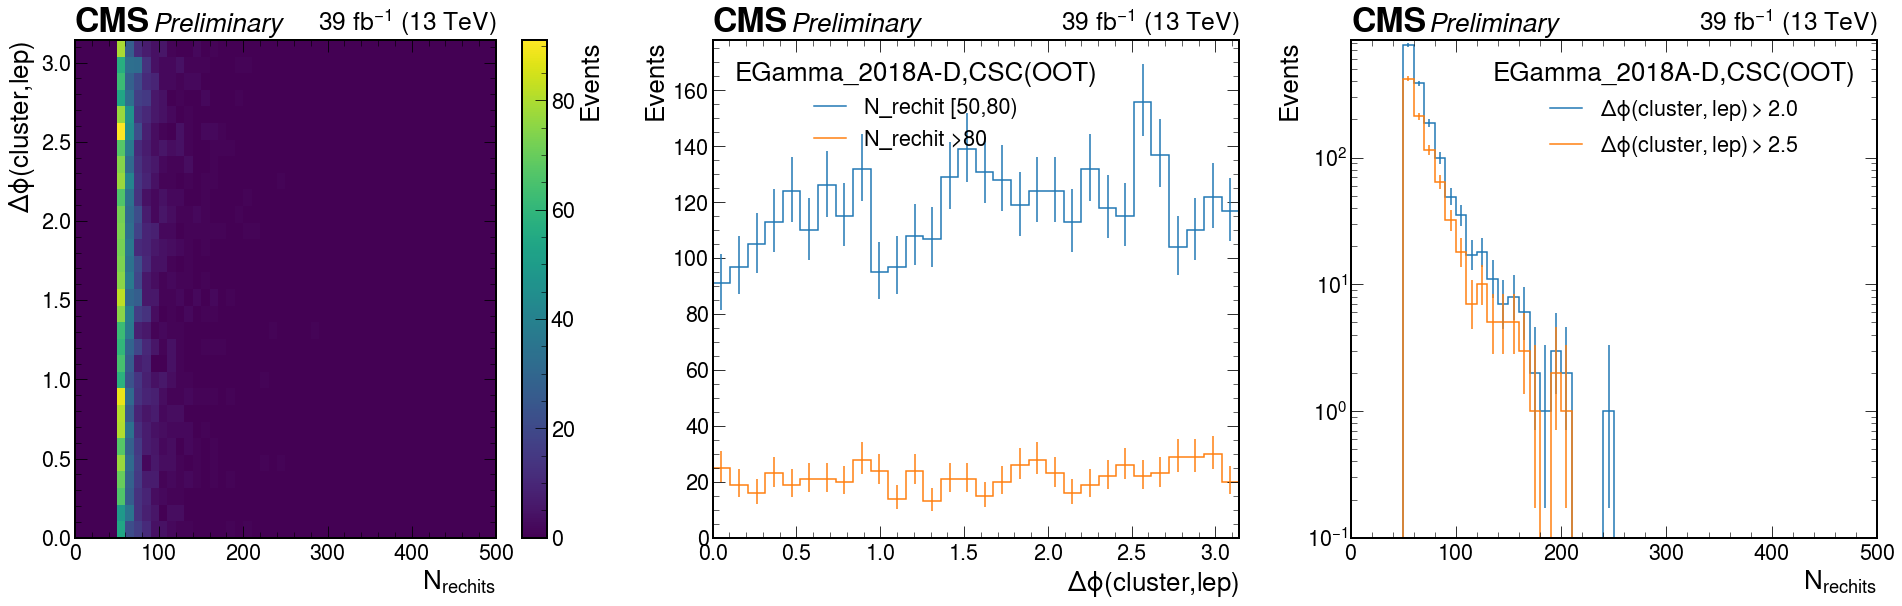

In [16]:

data = ['EGamma_2018A','EGamma_2018B','EGamma_2018C','EGamma_2018D']
lumi = "39"
label = "EGamma_2018A-D,CSC(OOT)"


h = out['dphi_cluster_csc']
h= h.sum("dphi_MET")
h = h.integrate("dataset",data)

region = "ABCD_OOT"

plotValidation(h,region,label,lumi)

### Electron DT OOT validation
h = out['dphi_cluster_dt']
h= h.sum("dphi_MET")
h = h.integrate("dataset",data)

region = "ABCD_dt_OOT"

label = "EGamma_2018A-D,DT(OOT)"
# plotValidation(h,region,label,lumi)


In [28]:
h = out['dphi_cluster_csc']
h = h.integrate("region","ABCD_OOT")
h = h.sum("dphi_MET")
eras = ['EGamma_2018A','EGamma_2018B','EGamma_2018C','EGamma_2018D']

h = h.integrate("dataset",eras)
SizeCuts = [90,100,110]
dphi_lep_const = 2.0

dphi_cuts = [1.8,2.0,2.2]
size_const = 80

# CSC, electron OOT
#printClosure(h,SizeCuts,dphi_lep_const,dphi_cuts,size_const)


h = out['dphi_cluster_dt']
h = h.integrate("region","ABCD_dt_OOT")
h = h.sum("dphi_MET")
h = h.integrate("dataset",eras)
printClosure(h,SizeCuts,dphi_lep_const,dphi_cuts,size_const)

/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/hist_tools.py:581: RuntimeWarning: Reducing along axis <Bin (name=dphi_lep) instance at 0x7f8ec7357c90>: requested stop 2.0 between bin boundaries, no interpolation is performed
  RuntimeWarning)
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/hist_tools.py:564: RuntimeWarning: Reducing along axis <Bin (name=dphi_lep) instance at 0x7f8ec7357c90>: requested start 2.0 between bin boundaries, no interpolation is performed
  RuntimeWarning)
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/hist_tools.py:581: RuntimeWarning: Reducing along axis <Bin (name=dphi_lep) instance at 0x7f8ec7357c90>: requested stop 1.8 between bin boundaries, no interpolation is performed
  RuntimeWarning)
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-

,cut,A,B,C,D,pred
0,N_hit>90,27.00 +- 5.20,675.00 +- 25.98,408.00 +- 20.20,16.00 +- 4.00,16.32 +- 3.30
1,N_hit>100,14.00 +- 3.74,688.00 +- 26.23,418.00 +- 20.45,6.00 +- 2.45,8.51 +- 2.33
2,N_hit>110,10.00 +- 3.16,692.00 +- 26.31,419.00 +- 20.47,5.00 +- 2.24,6.05 +- 1.95
3,dphi_lep>1.8,49.00 +- 7.00,571.00 +- 23.90,466.00 +- 21.59,40.00 +- 6.32,39.99 +- 6.23
4,dphi_lep>2.0,52.00 +- 7.21,650.00 +- 25.50,387.00 +- 19.67,37.00 +- 6.08,30.96 +- 4.73
5,dphi_lep>2.2,63.00 +- 7.94,736.00 +- 27.13,301.00 +- 17.35,26.00 +- 5.10,25.76 +- 3.69


## In-time validation (dPhi_MET>0.75)

/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/hist_tools.py:564: RuntimeWarning: Reducing along axis <Bin (name=dphi_MET) instance at 0x7f8ec738d450>: requested start 0.75 between bin boundaries, no interpolation is performed
  RuntimeWarning)
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/hist_tools.py:564: RuntimeWarning: Reducing along axis <Bin (name=dphi_lep) instance at 0x7f8ec738d2d0>: requested start 2.0 between bin boundaries, no interpolation is performed
  RuntimeWarning)
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/hist_tools.py:564: RuntimeWarning: Reducing along axis <Bin (name=dphi_lep) instance at 0x7f8ec738d2d0>: requested start 2.5 between bin boundaries, no interpolation is performed
  RuntimeWarning)
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/si

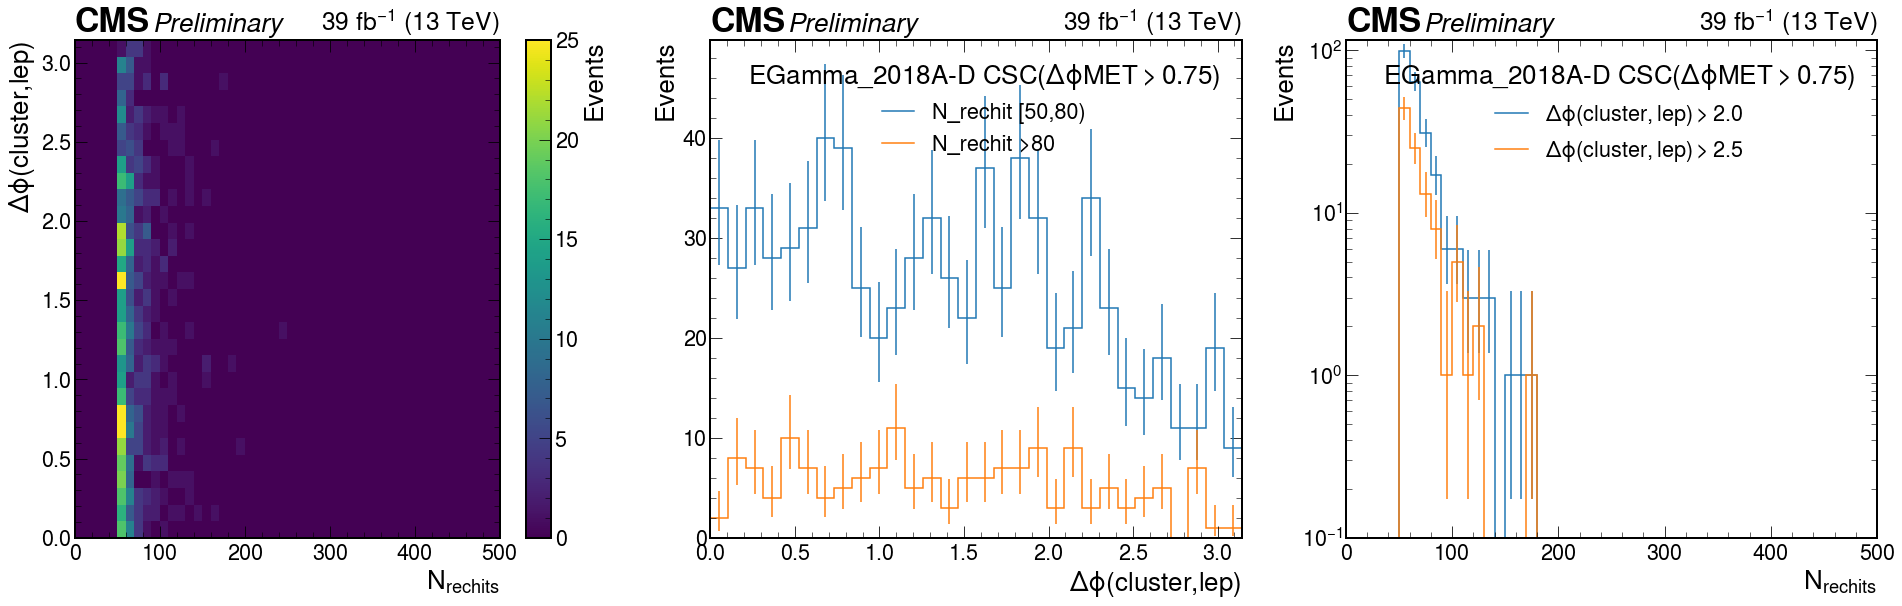

In [17]:
# plt.style.use("default")
hep.set_style(hep.style.CMS)

data = ['EGamma_2018A','EGamma_2018B','EGamma_2018C','EGamma_2018D']
lumi = "39"
label = "EGamma_2018A-D CSC($\Delta\phi MET>0.75$)"


h = out['dphi_cluster_csc']
h= h.integrate("dphi_MET",slice(0.75,None))
h = h.integrate("dataset",data)

region = "ABCD"
plotValidation(h,region,label,lumi)


### DT, in-time electron
label = "EGamma_2018A-D DT($\Delta\phi MET>0.75$)"


h = out['dphi_cluster_dt']
h= h.integrate("dphi_MET",slice(0.75,None))
h = h.integrate("dataset",data)

region = "ABCD_dt"
# plotValidation(h,region,label,lumi)


In [29]:
h = out['dphi_cluster_csc']
h = h.integrate("region","ABCD")
h = h.integrate("dphi_MET",slice(0.75,None))
eras = ['EGamma_2018A','EGamma_2018B','EGamma_2018C','EGamma_2018D']


h = h.integrate("dataset",eras)
SizeCuts = [90,100,110]
dphi_lep_const = 2.0

dphi_cuts = [1.8,2.0,2.2]
size_const = 80

# printClosure(h,SizeCuts,dphi_lep_const,dphi_cuts,size_const)

h = out['dphi_cluster_dt']
h = h.integrate("region","ABCD_dt")
h = h.integrate("dphi_MET",slice(0.75,None))
h = h.integrate("dataset",eras)
printClosure(h,SizeCuts,dphi_lep_const,dphi_cuts,size_const)


/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/hist_tools.py:564: RuntimeWarning: Reducing along axis <Bin (name=dphi_MET) instance at 0x7f8ec7357dd0>: requested start 0.75 between bin boundaries, no interpolation is performed
  RuntimeWarning)


,cut,A,B,C,D,pred
0,N_hit>90,22.00 +- 4.69,508.00 +- 22.54,227.00 +- 15.07,13.00 +- 3.61,9.83 +- 2.24
1,N_hit>100,15.00 +- 3.87,515.00 +- 22.69,233.00 +- 15.26,7.00 +- 2.65,6.79 +- 1.83
2,N_hit>110,9.00 +- 3.00,521.00 +- 22.83,237.00 +- 15.39,3.00 +- 1.73,4.09 +- 1.40
3,dphi_lep>1.8,40.00 +- 6.32,432.00 +- 20.78,271.00 +- 16.46,27.00 +- 5.20,25.09 +- 4.42
4,dphi_lep>2.0,45.00 +- 6.71,485.00 +- 22.02,218.00 +- 14.76,22.00 +- 4.69,20.23 +- 3.44
5,dphi_lep>2.2,52.00 +- 7.21,525.00 +- 22.91,178.00 +- 13.34,15.00 +- 3.87,17.63 +- 2.88


## Background selection optimization

In [26]:
out['dphi_cluster_dt'].identifiers("dphi_MET")

[<Interval ([0, 0.10471975512)) instance at 0x7f7700fcf490>,
 <Interval ([0.10471975512, 0.209439510239)) instance at 0x7f7700fcf4d0>,
 <Interval ([0.209439510239, 0.314159265359)) instance at 0x7f7700fcf510>,
 <Interval ([0.314159265359, 0.418879020479)) instance at 0x7f7700fcf550>,
 <Interval ([0.418879020479, 0.523598775598)) instance at 0x7f7700fcf5d0>,
 <Interval ([0.523598775598, 0.628318530718)) instance at 0x7f7700fcf610>,
 <Interval ([0.628318530718, 0.733038285838)) instance at 0x7f7700fcf650>,
 <Interval ([0.733038285838, 0.837758040957)) instance at 0x7f7700fcf690>,
 <Interval ([0.837758040957, 0.942477796077)) instance at 0x7f7700fcf590>,
 <Interval ([0.942477796077, 1.0471975512)) instance at 0x7f7700fcf6d0>,
 <Interval ([1.0471975512, 1.15191730632)) instance at 0x7f7700fcf710>,
 <Interval ([1.15191730632, 1.25663706144)) instance at 0x7f7700fcf750>,
 <Interval ([1.25663706144, 1.36135681656)) instance at 0x7f7700fcf790>,
 <Interval ([1.36135681656, 1.46607657168)) insta

In [31]:
out['dphi_cluster_dt'].integrate("dphi_lep",slice(0.733038285838,None))

/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/hist_tools.py:564: RuntimeWarning: Reducing along axis <Bin (name=dphi_lep) instance at 0x7f7701453a10>: requested start 0.733038285838 between bin boundaries, no interpolation is performed
  RuntimeWarning)


<Hist (dataset,region,ClusterSize,dphi_MET) instance at 0x7f76f86bc310>

In [5]:
h = out['dphi_cluster_csc'].integrate("dataset",["EGamma_2018A","EGamma_2018B","EGamma_2018C","EGamma_2018D"])

OOT = h.integrate("region","ABCD_OOT")
inTime = h.integrate("region","ABCD")

hdt = out['dphi_cluster_dt'].integrate("dataset",["EGamma_2018A","EGamma_2018B","EGamma_2018C","EGamma_2018D"])

OOT_dt = hdt.integrate("region","ABCD_dt_OOT")
inTime_dt = hdt.integrate("region","ABCD_dt")

inTime_dPhiMETcut = h.integrate("region","ABCD").integrate("dphi_MET",slice(0.733038285838,None))
inTime_dPhiMETcut_dt = hdt.integrate("region","ABCD_dt").integrate("dphi_MET",slice(0.733038285838,None))

/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/hist_tools.py:564: RuntimeWarning: Reducing along axis <Bin (name=dphi_MET) instance at 0x7f29d5abd310>: requested start 0.733038285838 between bin boundaries, no interpolation is performed
  RuntimeWarning)
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/hist_tools.py:564: RuntimeWarning: Reducing along axis <Bin (name=dphi_MET) instance at 0x7f29d5a07c90>: requested start 0.733038285838 between bin boundaries, no interpolation is performed
  RuntimeWarning)


In [6]:
OOT_dPhiMETcut = OOT.integrate("dphi_MET",slice(0.733038285838,None))
OOT_dPhiMETcut_dt = OOT_dt.integrate("dphi_MET",slice(0.733038285838,None))

In [7]:
6.81+6.44+24.85+0.94394

39.04394

/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  """Entry point for launching an IPython kernel.
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/uscms/home/kkwok/work/LLP/CMSSW_10_6_20/src/llp_analyzer/coffeaenv/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = numpy.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
/uscm

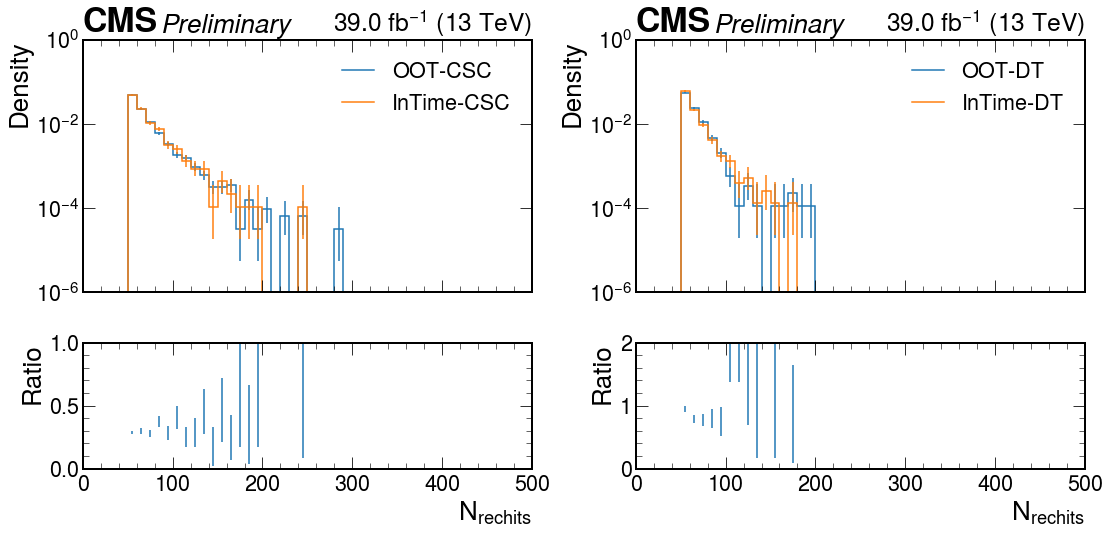

In [8]:
hep.set_style(hep.style.CMS)
fig, axs = plt.subplots(2,2, figsize=(16,8),gridspec_kw={"height_ratios":[2,1]},sharex=True)

density=True
projectTo = "ClusterSize"
axs = axs.flatten()

hist.plot1d(OOT_dPhiMETcut.project(projectTo),ax=axs[0],density=density,clear=False)
hist.plot1d(inTime_dPhiMETcut.project(projectTo),ax=axs[0],density=density,clear=False)

hist.plot1d(OOT_dPhiMETcut_dt.project(projectTo),ax=axs[1],density=density,clear=False)
hist.plot1d(inTime_dPhiMETcut_dt.project(projectTo),ax=axs[1],density=density,clear=False)

hist.plotratio(inTime_dPhiMETcut.project(projectTo), 
               OOT_dPhiMETcut.project(projectTo),unc="num",ax=axs[2],
               denom_fill_opts=None,error_opts="")

hist.plotratio(inTime_dPhiMETcut_dt.project(projectTo), 
               OOT_dPhiMETcut_dt.project(projectTo),unc="num",ax=axs[3],
               denom_fill_opts=None,error_opts="")
hep.cms.label(ax=axs[0],label="Preliminary",data=True,lumi="39.0")
hep.cms.label(ax=axs[1],label="Preliminary",data=True,lumi="39.0")
axs[0].set_xlabel("")
axs[0].legend(["OOT-CSC","InTime-CSC"])
if density==True:
    axs[0].set_xlim(0,500);axs[0].set_ylim(1e-6,1)
else:
    axs[0].set_xlim(0,500);axs[0].set_ylim(1,None)    
axs[0].set_yscale("log");axs[2].set_ylim(0,1)
axs[0].set_ylabel("Density");axs[2].set_ylabel("Ratio")
axs[1].set_xlabel("")
axs[1].legend(["OOT-DT","InTime-DT"])
if density==True:
    axs[1].set_xlim(0,500);axs[1].set_ylim(1e-6,1)
else:
    axs[1].set_xlim(0,500);axs[1].set_ylim(1,None)  
    
axs[1].set_yscale("log");axs[3].set_ylim(0,2)
axs[1].set_ylabel("Density");axs[3].set_ylabel("Ratio")


plt.tight_layout()

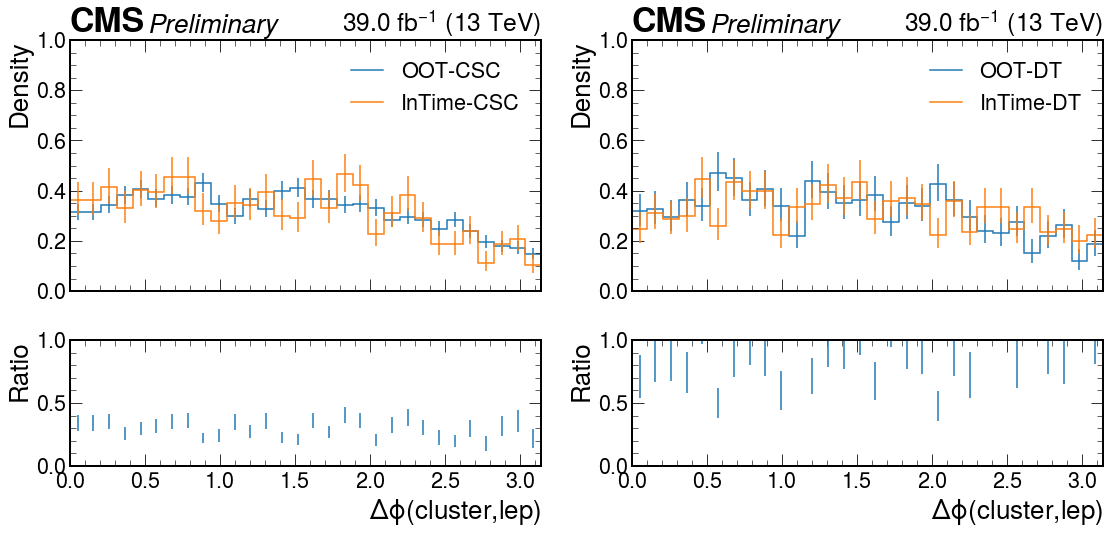

In [9]:
hep.set_style(hep.style.CMS)
fig, axs = plt.subplots(2,2, figsize=(16,8),gridspec_kw={"height_ratios":[2,1]},sharex=True)

projectTo = "dphi_lep"

axs = axs.flatten()

hist.plot1d(OOT_dPhiMETcut.project(projectTo),ax=axs[0],density=True,clear=False)
hist.plot1d(inTime_dPhiMETcut.project(projectTo),ax=axs[0],density=True,clear=False)

hist.plot1d(OOT_dPhiMETcut_dt.project(projectTo),ax=axs[1],density=True,clear=False)
hist.plot1d(inTime_dPhiMETcut_dt.project(projectTo),ax=axs[1],density=True,clear=False)

hist.plotratio(inTime_dPhiMETcut.project(projectTo), 
               OOT_dPhiMETcut.project(projectTo),unc="num",ax=axs[2],
               denom_fill_opts=None,error_opts="")

hist.plotratio(inTime_dPhiMETcut_dt.project(projectTo), 
               OOT_dPhiMETcut_dt.project(projectTo),unc="num",ax=axs[3],
               denom_fill_opts=None,error_opts="")
hep.cms.label(ax=axs[0],label="Preliminary",data=True,lumi="39.0")
hep.cms.label(ax=axs[1],label="Preliminary",data=True,lumi="39.0")

axs[0].set_xlabel("")
axs[0].legend(["OOT-CSC","InTime-CSC"])
axs[0].set_ylabel("Density")
axs[2].set_ylabel("Ratio")
axs[0].set_ylim(0,1)
axs[2].set_ylim(0,1)
axs[1].set_xlabel("")
axs[1].legend(["OOT-DT","InTime-DT"])
axs[1].set_ylabel("Density")
axs[3].set_ylabel("Ratio")
axs[1].set_ylim(0,1)
axs[3].set_ylim(0,1)

plt.tight_layout()

In [41]:
def predIntimeFromOOT(h,size,dphi_lep,dphi_met,isSignal=False,kfactor=0.25,lumi=137/23.):
 
    cut1 = slice(size,None)
    cut2 = slice(dphi_lep,None)
    cut3 = slice(None,dphi_met)
    D = h.integrate("ClusterSize",cut1).integrate("dphi_lep",cut2).integrate("dphi_MET",cut3)
#     A = h.integrate("ClusterSize",slice(cut,None)).integrate("dphi_lep",slice(None,2.0))
#     B = h.integrate("ClusterSize",slice(None,cut)).integrate("dphi_lep",slice(None,2.0))
#     C = h.integrate("ClusterSize",slice(None,cut)).integrate("dphi_lep",slice(2.0,None))
#     D = h.integrate("ClusterSize",slice(cut,None)).integrate("dphi_lep",slice(2.0,None))    
    if not isSignal:
        N_evt = list(D.values().values())[0] * kfactor * lumi
    else:
        N_evt = list(D.values().values())[0]         
    return N_evt

cut=70

sizeCuts = np.linspace(50,300,26)
dphi_lepCuts = np.linspace(0,np.pi,31)[1:-2]
dphi_METCuts = np.linspace(0,np.pi,31)[1:-1]


In [62]:
dphi_METCuts

array([0.10471976, 0.20943951, 0.31415927, 0.41887902, 0.52359878,
       0.62831853, 0.73303829, 0.83775804, 0.9424778 , 1.04719755,
       1.15191731, 1.25663706, 1.36135682, 1.46607657, 1.57079633,
       1.67551608, 1.78023584, 1.88495559, 1.98967535, 2.0943951 ,
       2.19911486, 2.30383461, 2.40855437, 2.51327412, 2.61799388,
       2.72271363, 2.82743339, 2.93215314, 3.0368729 ])

{}

In [142]:
data = []
metCut = 0.7

kfactor=0.9
lumi = 137/23.

for metCut in [0.1,0.2,0.3,0.7]:
    for cut in ak.cartesian([sizeCuts,dphi_lepCuts],axis=0):
        cut = cut.to_list()
        row =[cut[0],cut[1],metCut]
#         bkg = np.round(predIntimeFromOOT(OOT, cut[0],cut[1],metCut,False,kfactor,lumi),3)
#         sig = np.round(predIntimeFromOOT(signal, cut[0],cut[1],metCut,True,kfactor,lumi),3)
        bkg = np.round(predIntimeFromOOT(OOT_dt, cut[0],cut[1],metCut,False,kfactor,lumi),3)
        sig = np.round(predIntimeFromOOT(signal_dt, cut[0],cut[1],metCut,True,kfactor,lumi),3)

        row.append(bkg)
        row.append(sig)
        if bkg<20 and bkg>0:
            data.append(row)
    
import pandas as pd
df = pd.DataFrame(data, columns=["N_hit cut",'dPhi_lep cut', 'dphi_MET cut', 'Bkg', 'signal'])


In [143]:
df['s/sqrt(b)'] = df['signal']/np.sqrt(df['Bkg'])

In [144]:
df_met = df[df["dphi_MET cut"]==0.7]
x = df_met['N_hit cut'].to_numpy()
y = df_met['dPhi_lep cut'].to_numpy()
z = df_met['Bkg'].to_numpy()
sig = df_met['signal'].to_numpy()

In [145]:
df.loc[np.where(df['s/sqrt(b)']==max(df['s/sqrt(b)']))]

,N_hit cut,dPhi_lep cut,dphi_MET cut,Bkg,signal,s/sqrt(b)
310,100.0,1.989675,0.7,5.361,1.23,0.53123


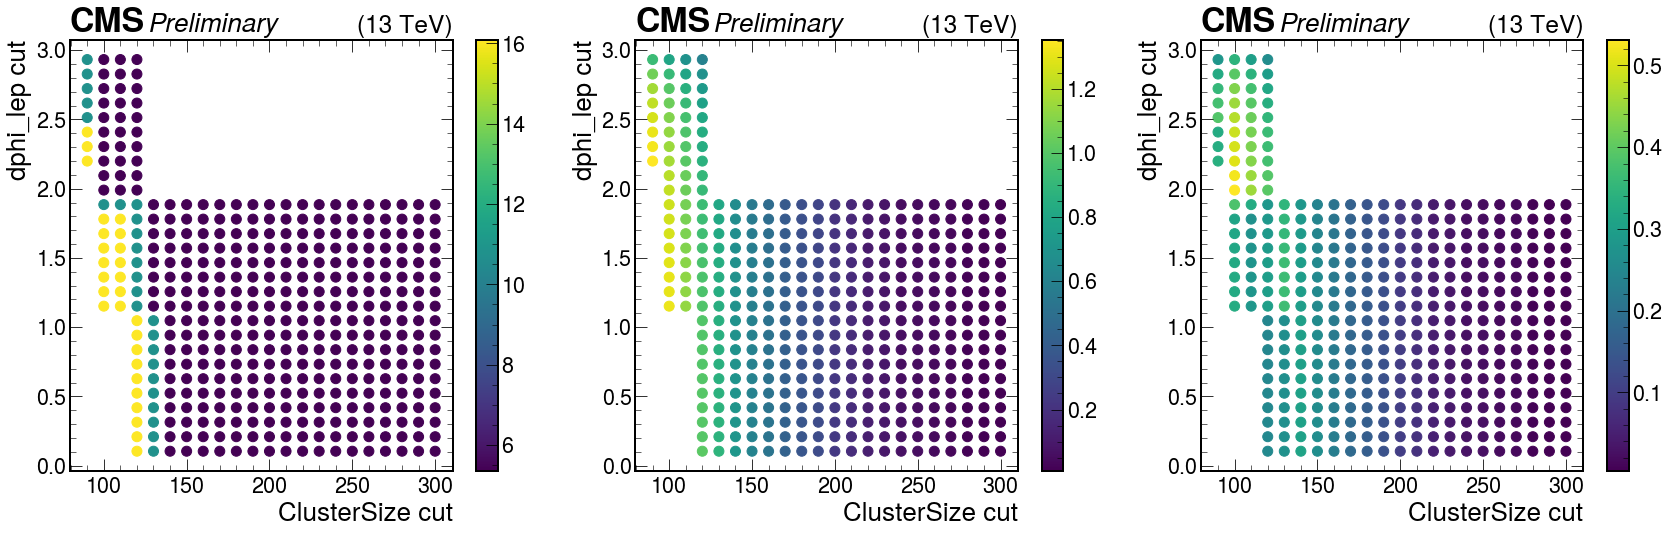

In [146]:
plt.style.use(hep.style.CMS) 

fig, axs = plt.subplots(1,3, figsize=(24,8))
axs = axs.flatten()

cax = axs[0].scatter(x,y,c=z,s=100)
fig.colorbar(cax, ax=axs[0])
cax = axs[1].scatter(x,y,c=sig,s=100)
fig.colorbar(cax, ax=axs[1])
cax = axs[2].scatter(x,y,c=sig/np.sqrt(z),s=100)
fig.colorbar(cax, ax=axs[2])

for ax in axs:
    hep.cms.label(ax=ax,label="Preliminary",data=True)
    ax.set_xlabel("ClusterSize cut")
    ax.set_ylabel("dphi_lep cut")    
    
plt.tight_layout()

In [123]:
out_s['sumw']

defaultdict_accumulator(float,
                        {'HNL_electronType_mHNL1p0_pl10': 662099.0,
                         'HNL_electronType_mHNL1p0_pl1000': 661983.0,
                         'HNL_electronType_mHNL1p0_pl100': 659831.0,
                         'EGamma_2018B': 6330716.0,
                         'EGamma_2018A': 1126568.0,
                         'WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8': 1297009.0,
                         'HNL_electronType_mHNL4p0_pl10_rwctau40': 659381.0,
                         'HNL_electronType_mHNL4p0_pl1000_rwctau2000': 660231.0,
                         'HNL_electronType_mHNL4p0_pl1000': 660231.0,
                         'HNL_electronType_mHNL2p0_pl1000': 659066.0,
                         'HNL_electronType_mHNL4p0_pl10': 659381.0,
                         'HNL_electronType_mHNL2p0_pl1000_rwctau10000': 659066.0,
                         'HNL_electronType_mHNL2p0_pl10_rwctau4': 662028.0,
                         'HNL_electronType_mHNL2p0

In [79]:
# HNL_histograms_Feb3_muons
with open('../HNL_histograms_Feb3_electrons.pickle','rb') as f:                
    out_s = pickle.load(f)

import HNLprocessor.corrections as corrections

xsections = corrections.load_xsection()
lumi = 137 ## fb    
for k,h in out_s.items():
#     print(k,)
    if (type(h)!=hist.Hist): continue
    h.scale({ d: lumi for d in h.identifiers("dataset") if d.name in xsections.keys()}, axis="dataset")
#     relabel(h)

In [135]:
h = out_s['dphi_cluster_csc']
signal = h.integrate("dataset",'HNL_electronType_mHNL4p0_pl1000').integrate("region","ABCD")
hdt = out_s['dphi_cluster_dt']
signal_dt = hdt.integrate("dataset",'HNL_electronType_mHNL4p0_pl1000').integrate("region","ABCD_dt")

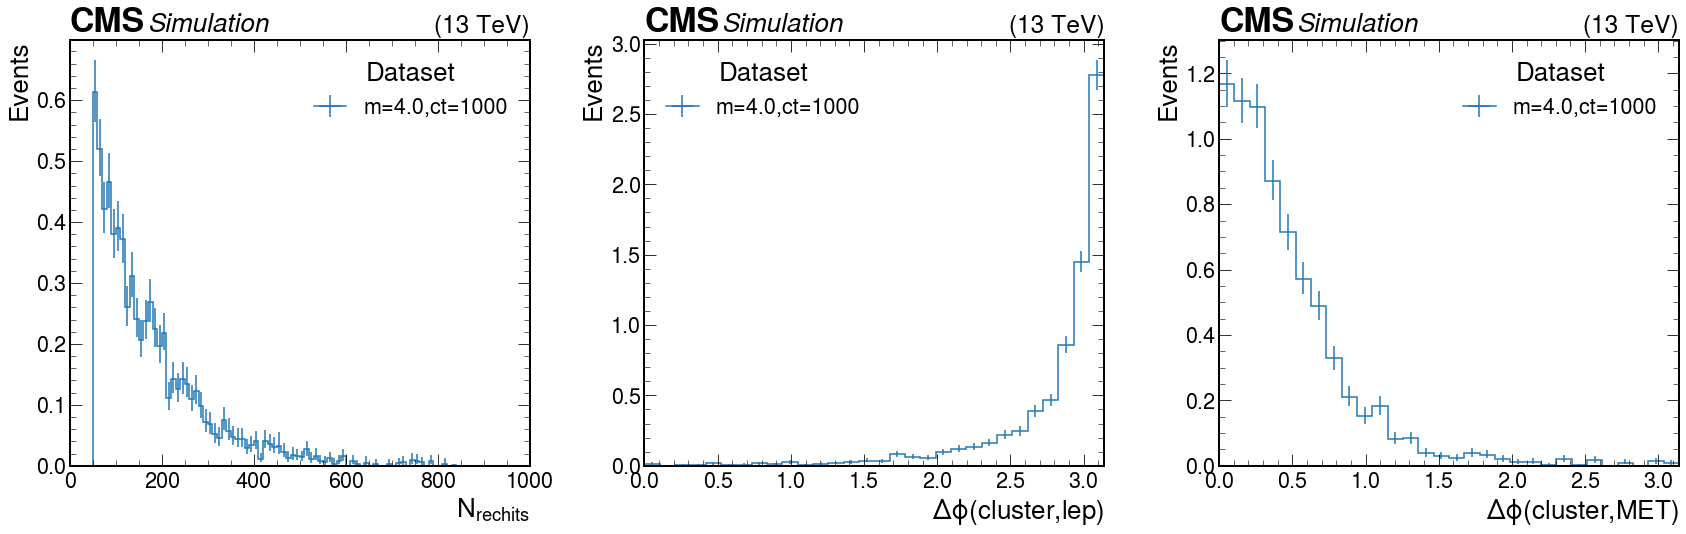

In [35]:
h = out_s['dphi_cluster_csc']
h = h['HNL_muonType_mHNL4p0_pl1000'].integrate("region","ABCD")
plt.style.use(hep.style.CMS) 

fig, axs = plt.subplots(1,3, figsize=(24,8))
axs = axs.flatten()

hist.plot1d(h.project("ClusterSize","dataset"),ax=axs[0])
hist.plot1d(h.project("dphi_lep","dataset"),ax=axs[1])
hist.plot1d(h.project("dphi_MET","dataset"),ax=axs[2])

for ax in axs:
    hep.cms.label(ax=ax,label="",data=False)
# axs[0].legend(["OOT","InTime"])    
#     ax.set_xlabel("ClusterSize cut")
#     ax.set_ylabel("dphi_lep cut")    
    
plt.tight_layout()

## Cluster ID distributions

In [157]:
out

{'nCluster': <Hist (dataset,region,nCluster,cutFlow) instance at 0x7ffa62559750>,
 'nCluster_dt': <Hist (dataset,region,nCluster,cutFlow) instance at 0x7ffa5bcf7350>,
 'nCluster_n-1': <Hist (dataset,nCluster,Nminus1) instance at 0x7ffa5bcf7d90>,
 'accept': <Hist (dataset,gLLP_csc,gLLP_dt) instance at 0x7ffa5bcf7f50>,
 'ClusterSize': <Hist (dataset,region,ClusterSize) instance at 0x7ffa5b776b10>,
 'ClusterTime': <Hist (dataset,region,ClusterTime) instance at 0x7ffa604c4dd0>,
 'ClusterEta': <Hist (dataset,region,ClusterEta) instance at 0x7ffa6260f250>,
 'ClusterAvgStation10': <Hist (dataset,region,ClusterAvgStation10) instance at 0x7ffa607f4c50>,
 'ClusterNStation10': <Hist (dataset,region,ClusterNStation10) instance at 0x7ffa62b39610>,
 'dphi_cluster_csc': <Hist (dataset,region,ClusterSize,dphi_lep,dphi_MET) instance at 0x7ffa605dd350>,
 'ClusterSize_dt': <Hist (dataset,region,ClusterSize) instance at 0x7ffa5bae9dd0>,
 'ClusterTime_dt': <Hist (dataset,region,ClusterBx) instance at 0x7ff

In [134]:
out['ClusterNStation10'][signals].integrate("region","ABCD").values()

{('HNL_muonType_mHNL1p0_pl10',): array([ 0.        , 47.37057391, 27.89465847, 10.70164763,  0.        ]),
 ('HNL_muonType_mHNL1p0_pl1000',): array([0.        , 7.373657  , 6.69870843, 1.40540338, 0.        ]),
 ('HNL_muonType_mHNL1p0_pl100',): array([  0.        , 216.99307731, 230.59324839,  50.54518513,
          0.        ])}

In [160]:
signals = [
#     'HNL_muonType_mHNL10p0_pl100',
#  'HNL_muonType_mHNL10p0_pl1000',
#  'HNL_muonType_mHNL10p0_pl10000',
#  'HNL_muonType_mHNL1p0_pl10',
#  'HNL_muonType_mHNL1p0_pl100',
#  'HNL_muonType_mHNL1p0_pl1000',
#  'HNL_muonType_mHNL2p0_pl10',
#  'HNL_muonType_mHNL2p0_pl100',
#  'HNL_muonType_mHNL2p0_pl1000',
#  'HNL_muonType_mHNL4p0_pl10',
#  'HNL_muonType_mHNL4p0_pl100',
#  'HNL_muonType_mHNL4p0_pl1000',
#  'HNL_muonType_mHNL7p0_pl100',
#  'HNL_muonType_mHNL7p0_pl1000',
#  'HNL_muonType_mHNL7p0_pl10000',
    "EGamma_2018C","EGamma_2018A","EGamma_2018D","EGamma_2018B"
  ]

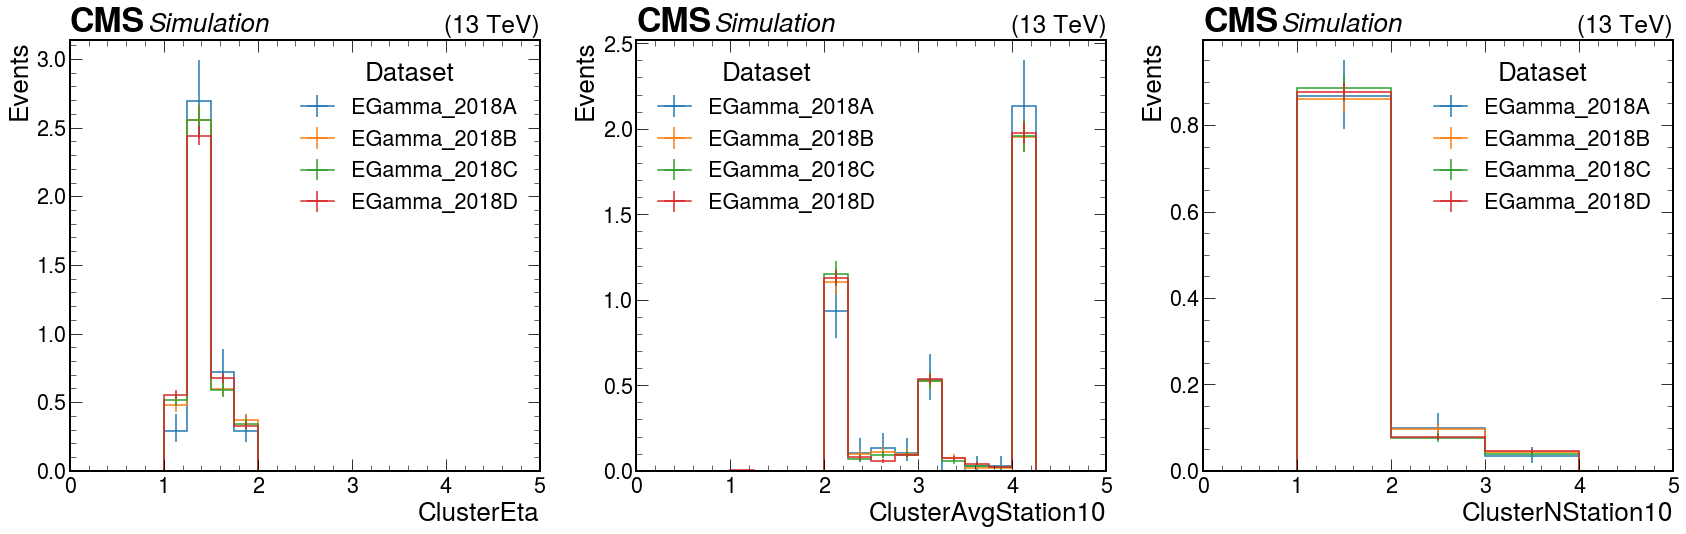

In [162]:
#
# h = out['Cluster']
h1=out['ClusterEta'][signals].integrate("region","ABCD_OOT")
h2=out['ClusterAvgStation10'][signals].integrate("region","ABCD_OOT")
h3=out['ClusterNStation10'][signals].integrate("region","ABCD_OOT")

plt.style.use(hep.style.CMS) 

fig, axs = plt.subplots(1,3, figsize=(24,8))
axs = axs.flatten()

hist.plot1d(h1.project("ClusterEta","dataset"),ax=axs[0],density=True)
hist.plot1d(h2.project("ClusterAvgStation10","dataset"),ax=axs[1],density=True)
hist.plot1d(h3.project("ClusterNStation10","dataset"),ax=axs[2],density=True)

for ax in axs:
    hep.cms.label(ax=ax,label="",data=False)
  
axs[0].set_xlim(0,None)
plt.tight_layout()